In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cdNow = pd.read_csv('CDNOW.txt',sep = '\s+',header = None, names=['user','date','quantity','price'])
cdNow.head()

,user,date,quantity,price
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [3]:
cdNow.date = pd.to_datetime(cdNow.date, format='%Y%m%d')
cdNow.set_index('date', drop=True, inplace = True)
cdNow.head()

,user,quantity,price
date,,,
1997-01-01,1,1,11.77
1997-01-12,2,1,12.00
1997-01-12,2,5,77.00
1997-01-02,3,2,20.76
1997-03-30,3,2,20.76


In [4]:
cdNow.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69659 entries, 1997-01-01 to 1997-03-26
Data columns (total 3 columns):
user        69659 non-null int64
quantity    69659 non-null int64
price       69659 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.1 MB


## 商品销售静态分析
### 各订单购买数量分析

In [5]:
cdNow.quantity.agg(['max','min','std','mean'])

max     99.000000
min      1.000000
std      2.333924
mean     2.410040
Name: quantity, dtype: float64

### 各订单购买金额分析

In [6]:
cdNow.price.agg(['max','min','std','mean'])

max     1286.010000
min        0.000000
std       36.281942
mean      35.893648
Name: price, dtype: float64

## 商品销售动态分析
### 订单数量和金额趋势分析

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


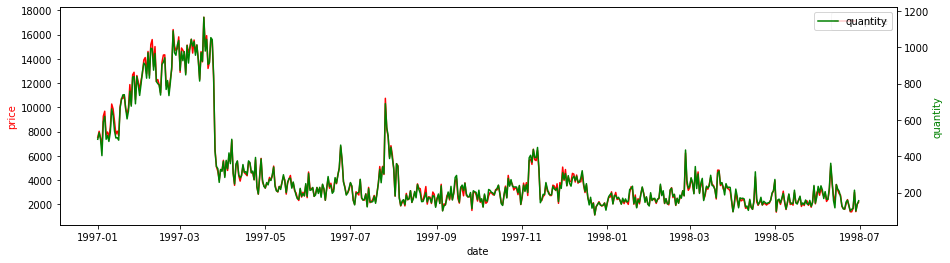

In [7]:
# 每天订单数量趋势
# 每一天所有订单价格的总和趋势
fig, ax1 = plt.subplots(figsize=(15,4))
ax1.plot(cdNow.price.resample('D').sum(),'r-', label = 'price')
ax1.set_xlabel('date', color='black')
ax1.set_ylabel('price', color='r')
ax1.legend()


ax2 = ax1.twinx()
ax2.plot(cdNow.quantity.resample('D').sum(), 'g-', label='quantity')
ax2.set_ylabel('quantity', color='g')
ax2.legend()

plt.show()

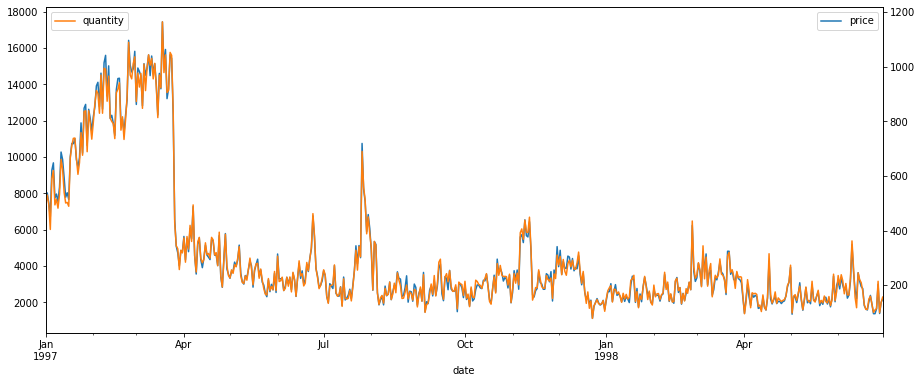

In [8]:
# 和上边一样,
fig = plt.figure(figsize=(15,6))
ax1 = cdNow.price.resample('D').sum().plot(y='price')
ax1.legend(loc=1)
ax2 = cdNow.quantity.resample('D').sum().plot(y='quantity', secondary_y=True)
ax2.legend(loc=2)
plt.show()

### 异常值检测

In [9]:
# NaN 数值检测
cdNow.isna().any()

user        False
quantity    False
price       False
dtype: bool

In [10]:
unitPrice = cdNow.price/cdNow.quantity

In [11]:
unitPrice.describe()

count    69659.000000
mean        15.459447
std          8.735528
min          0.000000
25%         12.270000
50%         13.990000
75%         15.490000
max        305.990000
dtype: float64

In [12]:
cdNow[unitPrice==0.0].head()

,user,quantity,price
date,,,
1997-01-02,455,1,0.0
1997-01-03,713,1,0.0
1997-01-04,908,1,0.0
1997-01-04,925,1,0.0
1997-01-05,1101,1,0.0


## 用户销售行为静态分析
### 各用户购买数量分析

In [13]:
# 各用户累积购买数量分析
cdNow.groupby('user').sum().describe()

,quantity,price
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


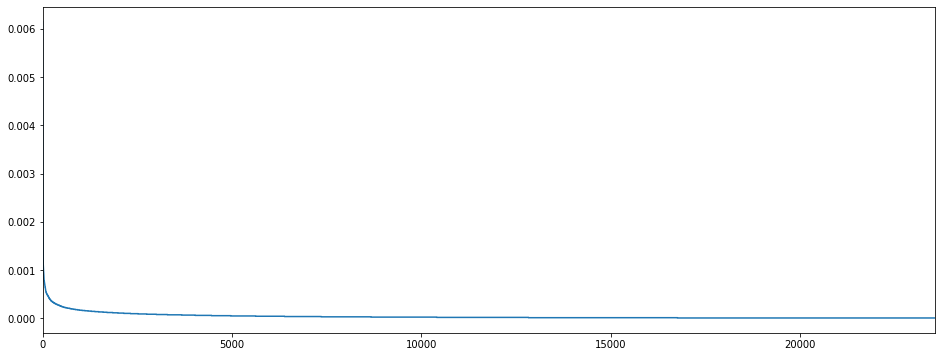

In [14]:
# 各用户 购买数量累计贡献分析
plt.figure(figsize=(16,6))
(cdNow.groupby('user').sum().quantity/cdNow.quantity.sum()).sort_values(ascending=False).plot(use_index=False)
plt.show()

user
8830     99
23474    70
22279    63
8529     56
7592     47
Name: quantity, dtype: int64


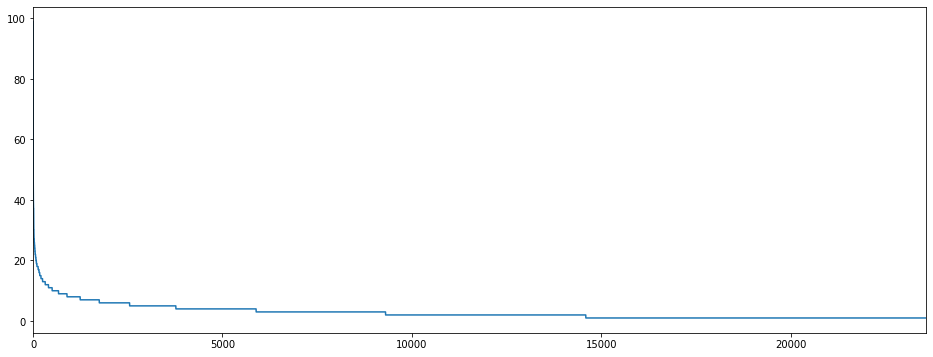

In [15]:
# 各用户 最大单笔贡献分析
plt.figure(figsize=(16,6))
print(cdNow.groupby('user').max().quantity.sort_values(ascending=False).head())
cdNow.groupby('user').max().quantity.sort_values(ascending=False).plot(use_index=False)
plt.show()

### 各用户购买金额分析

In [16]:
# 各用户累积购买金额分析
totalPurchase = cdNow.groupby('user').sum().price.sort_values(ascending=False)
print(totalPurchase.describe())
bins = pd.cut(totalPurchase,list(np.arange(-1,14000,500)))
totalPurchase.groupby(bins).count()

count    23570.000000
mean       106.080426
std        240.925195
min          0.000000
25%         19.970000
50%         43.395000
75%        106.475000
max      13990.930000
Name: price, dtype: float64


price
(-1, 499]         22834
(499, 999]          535
(999, 1499]         114
(1499, 1999]         44
(1999, 2499]         17
(2499, 2999]          7
(2999, 3499]          4
(3499, 3999]          3
(3999, 4499]          6
(4499, 4999]          1
(4999, 5499]          0
(5499, 5999]          0
(5999, 6499]          1
(6499, 6999]          2
(6999, 7499]          0
(7499, 7999]          0
(7999, 8499]          0
(8499, 8999]          1
(8999, 9499]          0
(9499, 9999]          0
(9999, 10499]         0
(10499, 10999]        0
(10999, 11499]        0
(11499, 11999]        0
(11999, 12499]        0
(12499, 12999]        0
(12999, 13499]        0
(13499, 13999]        1
Name: price, dtype: int64

In [17]:
# 各用户累计购买金额贡献分析

In [18]:
# 各用户最大单笔消费金额分析
cdNow[['price','user']].groupby('user').max().describe()

,price
count,23570.000000
mean,43.897931
std,46.153873
min,0.000000
25%,15.360000
50%,29.980000
75%,54.677500
max,1286.010000


### 各用户购买次数分析

In [19]:
cdNow.groupby('user').count().quantity.describe()

count    23570.000000
mean         2.955409
std          4.736558
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        217.000000
Name: quantity, dtype: float64

## 用户消费行为动态分析

### 各用户第一次购买时间分析

In [20]:
cdNow.reset_index(drop=False, inplace=True)

In [21]:
cdNow[['user','date']].groupby('user').min().head()

,date
user,
1,1997-01-01
2,1997-01-12
3,1997-01-02
4,1997-01-01
5,1997-01-01


### 各用户最后一次购买时间分析

In [22]:
cdNow[['user','date']].groupby('user').min().head()

,date
user,
1,1997-01-01
2,1997-01-12
3,1997-01-02
4,1997-01-01
5,1997-01-01


### 各用户最后一次消费与当前时间间隔

In [23]:
(pd.to_datetime('today') - cdNow[['user','date']].groupby('user').min()).head()

,date
user,
1,8232 days 18:39:38.859393
2,8221 days 18:39:38.859393
3,8231 days 18:39:38.859393
4,8232 days 18:39:38.859393
5,8232 days 18:39:38.859393


### 各用户生命周期分析

In [24]:
%%time
cdNow[['user','date']].groupby('user').apply(lambda x: x.max()-x.min()).head()

Wall time: 41.2 s


,user,date
user,,
1,0,0 days
2,0,0 days
3,0,511 days
4,0,345 days
5,0,367 days


In [25]:
%%time
def lifeCycle(x):
    return x.max() - x.min()

cdNow[['user','date']].groupby('user').apply(lifeCycle).head()

Wall time: 41.4 s


In [26]:
%%time
# 用内置函数效率好像更高
df = cdNow[['user','date']].groupby('user').agg(['max','min'])
print((df.date['max'] - df.date['min']).head())

user
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
dtype: timedelta64[ns]
Wall time: 208 ms


### 各用户首次回购周期

In [27]:
def rebuyPeriod(x):
    if len(x.date)>1:
        return x.date.iloc[1] - x.date.iloc[0]
    else:
        return None

In [28]:
%%time
cdNow[['user','date']].groupby('user').apply(rebuyPeriod).head()

Wall time: 2.77 s


user
1       NaT
2    0 days
3   87 days
4   17 days
5   13 days
dtype: timedelta64[ns]

### 用户平均购买周期

In [29]:
def avgPeriod(x):
    if len(x)>1:
        return (x.iloc[-1] - x.iloc[0])/(len(x)-1)
    else:
        return None
    
cdNow[['user','date']].groupby('user').apply(avgPeriod).head()

,user,date
user,,
1,NaN,NaT
2,0.0,0 days 00:00:00
3,0.0,102 days 04:48:00
4,0.0,115 days 00:00:00
5,0.0,36 days 16:48:00


### 各用户，各月复购率
购买次数大于1次的人/所有购买过的人=复购率

假若1月1日有1000名会员来店消费，针对这1000名会员，我们统计出30天内回头的有500名，60天内回头的有700名，90天内回头的有800名，则30天内复购率是50%，60天内复购率为70%，90天内复购率为80%。

In [30]:
%%time
cdNow[['date','user']].set_index('date').groupby('user').resample('M').count()

Wall time: 1min 47s


user
user  date            
1     1997-01-31     1
2     1997-01-31     2
3     1997-01-31     1
      1997-02-28     0
      1997-03-31     1
      1997-04-30     1
      1997-05-31     0
      1997-06-30     0
      1997-07-31     0
      1997-08-31     0
      1997-09-30     0
      1997-10-31     0
      1997-11-30     2
      1997-12-31     0
      1998-01-31     0
      1998-02-28     0
      1998-03-31     0
      1998-04-30     0
      1998-05-31     1
4     1997-01-31     2
      1997-02-28     0
      1997-03-31     0
      1997-04-30     0
      1997-05-31     0
      1997-06-30     0
      1997-07-31     0
      1997-08-31     1
      1997-09-30     0
      1997-10-31     0
      1997-11-30     0
...                ...
23561 1998-01-31     1
      1998-02-28     0
      1998-03-31     0
      1998-04-30     0
      1998-05-31     1
23562 1997-03-31     1
23563 1997-03-31     1
      1997-04-30     0
      1997-05-31     0
      1997-06-30     0
      1997-07-31     0
      1997-08-31     0
      1997-09-30     0
      1997-10-31     1
23564 1997-03-31     1
      1997-04-30     0
      1997-05-31     1
      1997-06-30     0
      1997-07-31     0
      1997-08-31     0
      1997-09-30     0
      1997-10-31     0
      1997-11-30     1
23565 1997-03-31     1
23566 1997-03-31     1
23567 1997-03-31     1
23568 1997-03-31     1
      1997-04-30     2
23569 1997-03-31     1
23570 1997-03-31     2

[127768 rows x 1 columns]

### 各用户，各月回购率

### 各用户，各月留存率

### 用户分层